# K-Means Clustering in Python

Clustering is a type of Unsupervised learning. This is very often used when you don’t have labeled data. K-Means Clustering is one of the popular clustering algorithm. The goal of this algorithm is to find groups(clusters) in the given data. In this post we will implement K-Means algorithm using Python from scratch.

### K-Means Clustering

K-Means is a very simple algorithm which clusters the data into K number of clusters. The following image from PyPR is an example of K-Means Clustering.

In [1]:
from IPython.display import Image
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

![jupyter](https://i.imgur.com/S65Sk9c.jpg)

![jupyter](https://raw.githubusercontent.com/andrewxiechina/DataScience/master/K-Means/k4XcapI.gif)

The above animation is an example of running K-Means Clustering on a two dimensional data.

#### Implementation using Python

The dataset we are gonna use has 3000 entries with 3 clusters. So we already know the value of K.

We will start by importing the dataset.

In [22]:
# Importing the dataset
data = pd.read_csv('xclara.csv')
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [23]:
print(data.shape)

(3000, 2)


In [24]:
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array((list(zip(f1,f2))))  # convert to list

In [25]:
X.shape

(3000, 2)

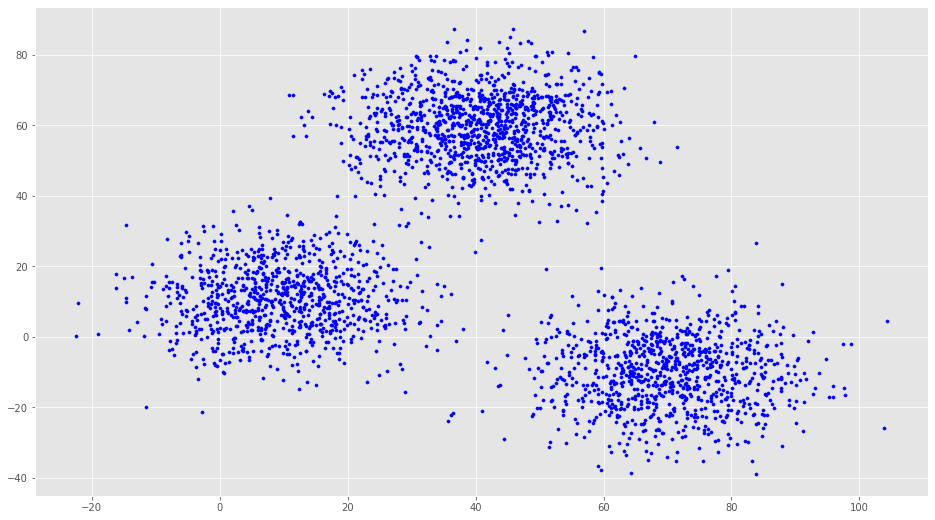

In [26]:
plt.scatter(f1,f2,c='blue',s = 10)

In [28]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [29]:
def dist(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

# Step 1
### Initialization: randomly select centroid

In [39]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)

# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)

#randomly generate centroid
C = np.array(list(zip(C_x, C_y)), dtype=np.float32) #

# store centroid
C_old = np.zeros(C.shape)

In [40]:
print(C)

[[29. 42.]
 [45. 20.]
 [35.  3.]]


### Plotting along with the Centroids

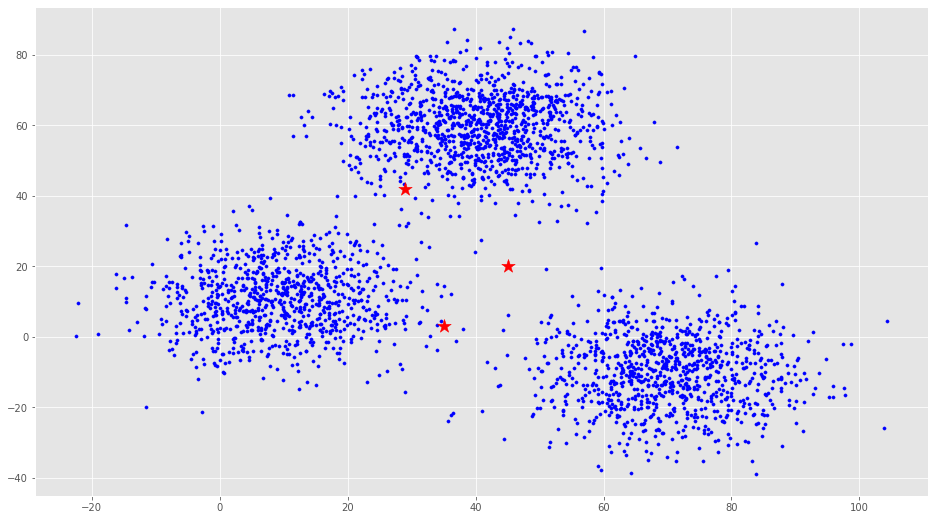

In [41]:
# Plot the data and the centers generated as random
plt.scatter(f1,f2,c='blue',s = 10)
plt.scatter(C_x, C_y, marker='*', s=200, c='r')

### Stop criterion - stable objective function value 

In [42]:
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        ## step 1: Distance calculation ??
        ##        ###################   ##
        ##        fill in code here     ##
        ##        ###################   ##
        distances = dist(X[i], C) 
        
        ## step 2: reassign cluster indicator
        cluster = np.argmin(distances)
        ##        ###################   ##
        ##        fill in code here     ##
        ##        ###################   ##
        clusters[i] = cluster
    
    # Storing the old centroid values
    C_old = deepcopy(C)
    
    # step 3: Finding the new centroids by taking the average value
    for i in range(k):
        ##        ###################   ##
        ##        fill in code here     ##
        ##        ###################   ##
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

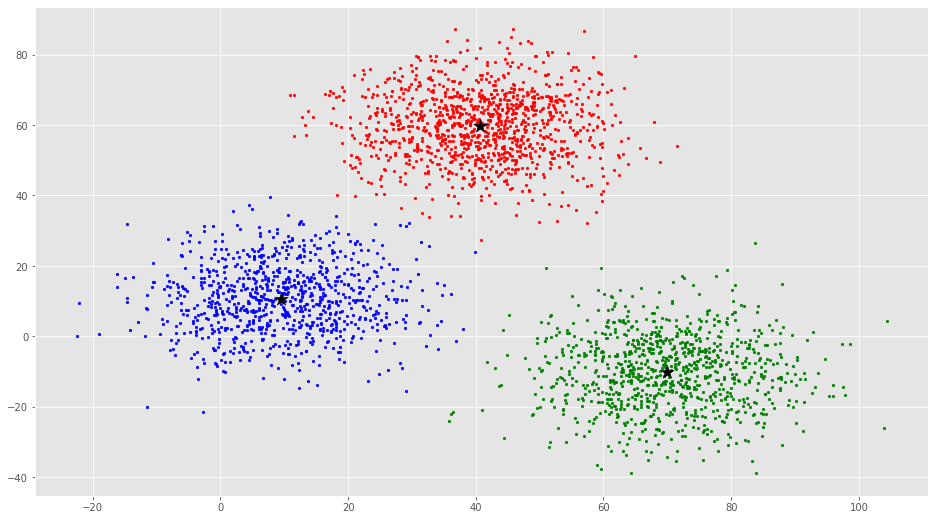

In [43]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

# Exercise 1:
## Stop criterion - maximal iterations

### insert code here 

In [36]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
error = dist(C, C_old, None)

# Loop will run till the error becomes zero
n=0
while n < 51:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    n=n+1;

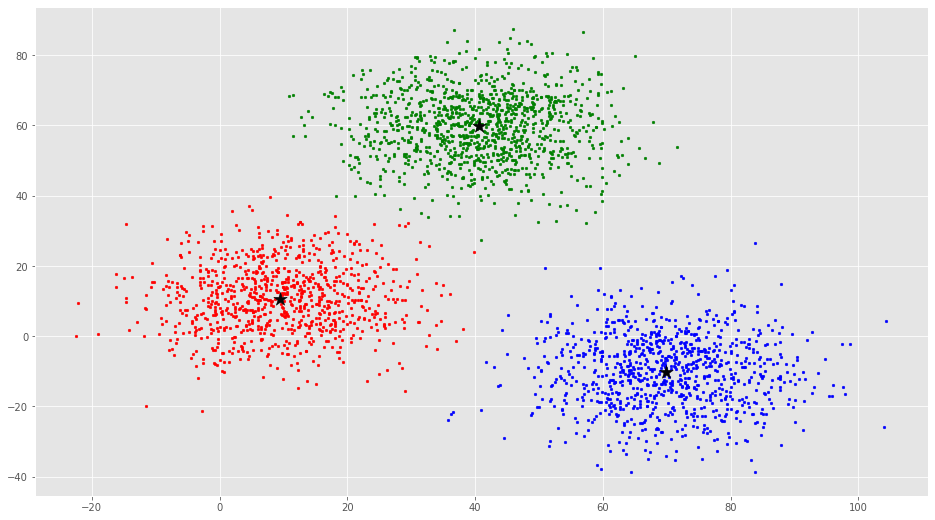

In [15]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

# Exercise 2
## Using Sklearn Library to Operate K-means

In [16]:
#lets implement the same algorithm using sklearn libraries
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)


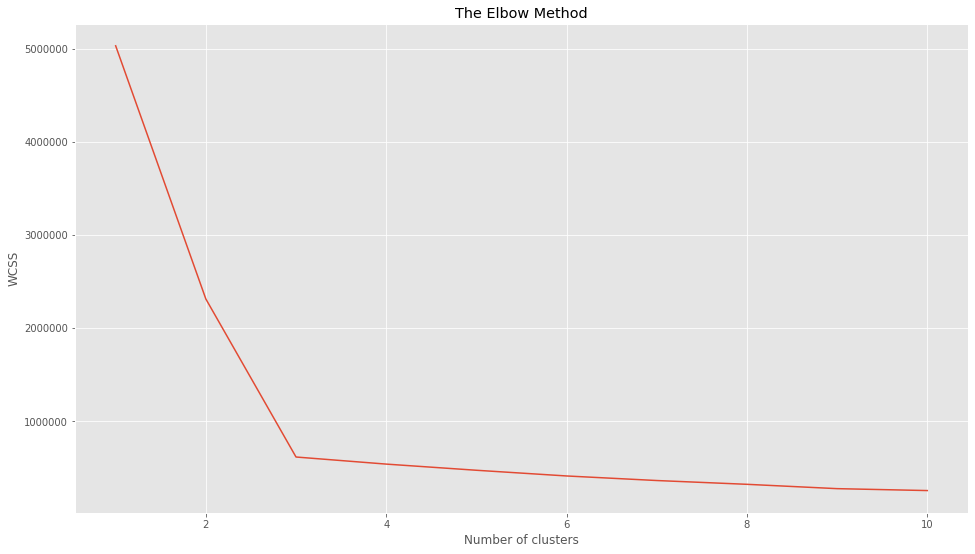

In [17]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Exercise 3 (optional)
Full connectivity neural network in Keras conducts k-means

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics

data = pd.read_csv('xclara.csv')
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [20]:
Y_kmeans = kmeans.labels_
X = data
Y_kmeans.shape
#print(Y_kmeans)

(3000,)

In [21]:
model = Sequential()

###############################################################
#####  design your fully connected neural network model here ##
###############################################################

model.summary()

model.compile(loss='mse', optimizer='sgd', metrics=['mse'])

history = model.fit(X,Y_kmeans, epochs=5, batch_size=1, shuffle=False)

ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

In [ ]:
test_loss, test_mse = model.evaluate(X,Y_kmeans,verbose=1)

print('loss:%.4f accuracy:%.4f' %(test_loss, test_mse))